In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=3eb505bffcf334cae65771ea8b3b94c8fd14b202c4c17e4afbabb37ca6dcdb7a
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession


# Create a Spark session
spark = SparkSession.builder.appName("HeartDiseaseClassification").getOrCreate()

# Load the dataset into a DataFrame
df = spark.read.csv("/content/heart_2020_cleaned.csv", header=True, inferSchema=True)
df.show()

+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+
|HeartDisease|  BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|            Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|
+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+
|          No| 16.6|    Yes|             No|    No|           3.0|        30.0|         No|Female|      55-59|White|                 Yes|             Yes|Very good|      5.0|   Yes|           No|       Yes|
|          No|20.34|     No|             No|   Yes|           0.0|         0.0|         No|Female|80 or older|White|                  No|             Yes|Very good|      7.

In [ ]:
df.count()

319795

In [ ]:
len(df.columns)

18

In [ ]:
df.printSchema()

root
 |-- HeartDisease: string (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoking: string (nullable = true)
 |-- AlcoholDrinking: string (nullable = true)
 |-- Stroke: string (nullable = true)
 |-- PhysicalHealth: double (nullable = true)
 |-- MentalHealth: double (nullable = true)
 |-- DiffWalking: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- AgeCategory: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Diabetic: string (nullable = true)
 |-- PhysicalActivity: string (nullable = true)
 |-- GenHealth: string (nullable = true)
 |-- SleepTime: double (nullable = true)
 |-- Asthma: string (nullable = true)
 |-- KidneyDisease: string (nullable = true)
 |-- SkinCancer: string (nullable = true)



In [ ]:
df.describe().show()

+-------+------------+------------------+-------+---------------+------+------------------+-----------------+-----------+------+-----------+--------------------+--------------------+----------------+---------+------------------+------+-------------+----------+
|summary|HeartDisease|               BMI|Smoking|AlcoholDrinking|Stroke|    PhysicalHealth|     MentalHealth|DiffWalking|   Sex|AgeCategory|                Race|            Diabetic|PhysicalActivity|GenHealth|         SleepTime|Asthma|KidneyDisease|SkinCancer|
+-------+------------+------------------+-------+---------------+------+------------------+-----------------+-----------+------+-----------+--------------------+--------------------+----------------+---------+------------------+------+-------------+----------+
|  count|      319795|            319795| 319795|         319795|319795|            319795|           319795|     319795|319795|     319795|              319795|              319795|          319795|   319795|        

In [ ]:
df.head(5)

[Row(HeartDisease='No', BMI=16.6, Smoking='Yes', AlcoholDrinking='No', Stroke='No', PhysicalHealth=3.0, MentalHealth=30.0, DiffWalking='No', Sex='Female', AgeCategory='55-59', Race='White', Diabetic='Yes', PhysicalActivity='Yes', GenHealth='Very good', SleepTime=5.0, Asthma='Yes', KidneyDisease='No', SkinCancer='Yes'),
 Row(HeartDisease='No', BMI=20.34, Smoking='No', AlcoholDrinking='No', Stroke='Yes', PhysicalHealth=0.0, MentalHealth=0.0, DiffWalking='No', Sex='Female', AgeCategory='80 or older', Race='White', Diabetic='No', PhysicalActivity='Yes', GenHealth='Very good', SleepTime=7.0, Asthma='No', KidneyDisease='No', SkinCancer='No'),
 Row(HeartDisease='No', BMI=26.58, Smoking='Yes', AlcoholDrinking='No', Stroke='No', PhysicalHealth=20.0, MentalHealth=30.0, DiffWalking='No', Sex='Male', AgeCategory='65-69', Race='White', Diabetic='Yes', PhysicalActivity='Yes', GenHealth='Fair', SleepTime=8.0, Asthma='Yes', KidneyDisease='No', SkinCancer='No'),
 Row(HeartDisease='No', BMI=24.21, Smoki

In [ ]:
from pyspark.sql.functions import col, count

# Count missing values in each column
missing_values = df.select([count(col(c)).alias(c) for c in df.columns])

# Show the missing values count
missing_values.show()

+------------+------+-------+---------------+------+--------------+------------+-----------+------+-----------+------+--------+----------------+---------+---------+------+-------------+----------+
|HeartDisease|   BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory|  Race|Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|
+------------+------+-------+---------------+------+--------------+------------+-----------+------+-----------+------+--------+----------------+---------+---------+------+-------------+----------+
|      319795|319795| 319795|         319795|319795|        319795|      319795|     319795|319795|     319795|319795|  319795|          319795|   319795|   319795|319795|       319795|    319795|
+------------+------+-------+---------------+------+--------------+------------+-----------+------+-----------+------+--------+----------------+---------+---------+------+-------------+----------+



In [ ]:
df.groupBy('AgeCategory').count().sort("count",ascending=False).show()

+-----------+-----+
|AgeCategory|count|
+-----------+-----+
|      65-69|34151|
|      60-64|33686|
|      70-74|31065|
|      55-59|29757|
|      50-54|25382|
|80 or older|24153|
|      45-49|21791|
|      75-79|21482|
|      18-24|21064|
|      40-44|21006|
|      35-39|20550|
|      30-34|18753|
|      25-29|16955|
+-----------+-----+



In [ ]:
df.groupBy('Race').count().sort("count",ascending=False).show()

+--------------------+------+
|                Race| count|
+--------------------+------+
|               White|245212|
|            Hispanic| 27446|
|               Black| 22939|
|               Other| 10928|
|               Asian|  8068|
|American Indian/A...|  5202|
+--------------------+------+



In [ ]:
df.groupBy('GenHealth').count().sort("count",ascending=False).show()

+---------+------+
|GenHealth| count|
+---------+------+
|Very good|113858|
|     Good| 93129|
|Excellent| 66842|
|     Fair| 34677|
|     Poor| 11289|
+---------+------+



In [ ]:
df.groupBy('SleepTime').count().sort("count",ascending=False).show()

+---------+-----+
|SleepTime|count|
+---------+-----+
|      7.0|97751|
|      8.0|97602|
|      6.0|66721|
|      5.0|19184|
|      9.0|16041|
|     10.0| 7796|
|      4.0| 7750|
|     12.0| 2205|
|      3.0| 1992|
|      2.0|  788|
|      1.0|  551|
|     11.0|  415|
|     14.0|  243|
|     16.0|  236|
|     15.0|  189|
|     18.0|  102|
|     13.0|   97|
|     20.0|   64|
|     24.0|   30|
|     17.0|   21|
+---------+-----+
only showing top 20 rows



In [ ]:
df.groupBy('Sex').count().sort("count",ascending=False).show()

+------+------+
|   Sex| count|
+------+------+
|Female|167805|
|  Male|151990|
+------+------+



In [ ]:
df.groupBy('Diabetic').count().sort("count",ascending=False).show()

+--------------------+------+
|            Diabetic| count|
+--------------------+------+
|                  No|269653|
|                 Yes| 40802|
|No, borderline di...|  6781|
|Yes (during pregn...|  2559|
+--------------------+------+



In [ ]:
df.select('SleepTime').distinct().count()

24

In [ ]:
df.filter(df['SleepTime']>=8).show()

+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+
|HeartDisease|  BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|            Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|
+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+
|          No|26.58|    Yes|             No|    No|          20.0|        30.0|         No|  Male|      65-69|White|                 Yes|             Yes|     Fair|      8.0|   Yes|           No|        No|
|          No|23.71|     No|             No|    No|          28.0|         0.0|        Yes|Female|      40-44|White|                  No|             Yes|Very good|      8.

In [ ]:
df.filter((df['BMI'] >=  18.5 ) & (df['BMI'] <= 24.9)).show()


+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+
|HeartDisease|  BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|            Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|
+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+
|          No|20.34|     No|             No|   Yes|           0.0|         0.0|         No|Female|80 or older|White|                  No|             Yes|Very good|      7.0|    No|           No|        No|
|          No|24.21|     No|             No|    No|           0.0|         0.0|         No|Female|      75-79|White|                  No|              No|     Good|      6.

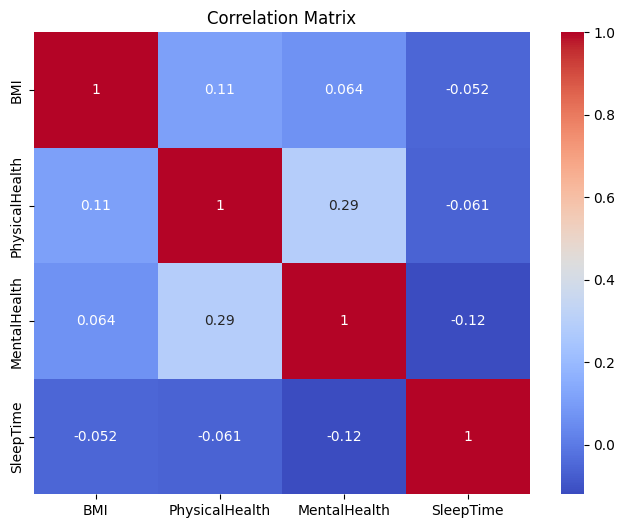

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns


# Select numerical columns for correlation matrix
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="features")
data_assembled = assembler.transform(df)

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(data_assembled, "features").head()

# Extract the correlation matrix values
correlation_values = correlation_matrix[0].toArray()

# Display the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_values, annot=True, cmap='coolwarm', xticklabels=numerical_cols, yticklabels=numerical_cols)
plt.title("Correlation Matrix")
plt.show()


DataFrame[HeartDisease: string, BMI: double, Smoking: string, AlcoholDrinking: string, Stroke: string, PhysicalHealth: double, MentalHealth: double, DiffWalking: string, Sex: string, AgeCategory: string, Race: string, Diabetic: string, PhysicalActivity: string, GenHealth: string, SleepTime: double, Asthma: string, KidneyDisease: string, SkinCancer: string, Smoking_index: double, AlcoholDrinking_index: double, Stroke_index: double, Sex_index: double, AgeCategory_index: double, Race_index: double, Diabetic_index: double, PhysicalActivity_index: double, GenHealth_index: double, Asthma_index: double, KidneyDisease_index: double, SkinCancer_index: double, Smoking_encoded: vector, AlcoholDrinking_encoded: vector, Stroke_encoded: vector, Sex_encoded: vector, AgeCategory_encoded: vector, Race_encoded: vector, Diabetic_encoded: vector, PhysicalActivity_encoded: vector, GenHealth_encoded: vector, Asthma_encoded: vector, KidneyDisease_encoded: vector, SkinCancer_encoded: vector, features: vector,

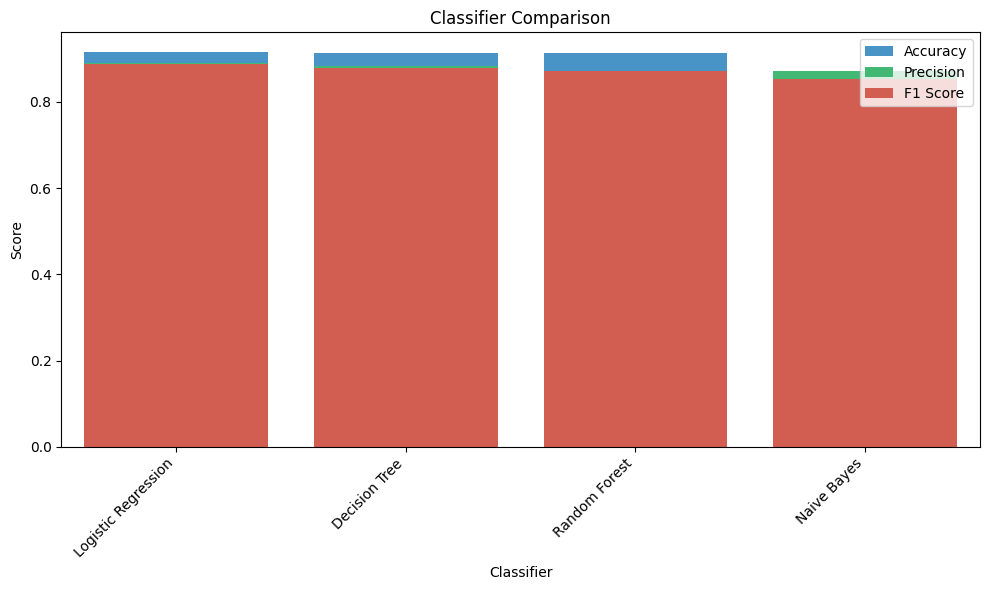

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Define the categorical columns and index them
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index").fit(df) for col in categorical_cols]
data_indexed = df
for indexer in indexers:
    data_indexed = indexer.transform(data_indexed)

# One-hot encode categorical index columns
encoder = OneHotEncoder(inputCols=[col + "_index" for col in categorical_cols], outputCols=[col + "_encoded" for col in categorical_cols])
encoder_model = encoder.fit(data_indexed)
data_encoded = encoder_model.transform(data_indexed)

# Assemble feature columns into a single vector column
feature_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'] + [col + "_encoded" for col in categorical_cols]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data_final = assembler.transform(data_encoded)

# Convert target column to numerical label
label_indexer = StringIndexer(inputCol='HeartDisease', outputCol='label')
data_final = label_indexer.fit(data_final).transform(data_final)
# Split the data into training and testing sets
train_data, test_data = data_final.randomSplit([0.8, 0.2], seed=42)

# Create a list of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression(featuresCol="features", labelCol="label")),
    ("Decision Tree", DecisionTreeClassifier(featuresCol="features", labelCol="label")),
    ("Random Forest", RandomForestClassifier(featuresCol="features", labelCol="label")),
    ("Naive Bayes", NaiveBayes(featuresCol="features", labelCol="label"))
]

# Initialize lists to store evaluation results
accuracies = []
precisions = []
f1_scores = []

# Iterate over classifiers
for clf_name, classifier in classifiers:
    # Build and train the classifier
    model = classifier.fit(train_data)

    # Make predictions on the test data
    predictions = model.transform(test_data)

    # Evaluate the model
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
    accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    f1 = evaluator.evaluate(predictions, {evaluator.metricName: "weightedFMeasure"})

    accuracies.append(accuracy)
    precisions.append(precision)
    f1_scores.append(f1)

    print(f"{clf_name} Evaluation:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print("=" * 40)

# Close the Spark session
spark.stop()

# Plot the comparison with custom colors
plt.figure(figsize=(10, 6))

# Define custom colors
colors = ['#3498db', '#2ecc71', '#e74c3c']

# Plot the bars with custom colors
sns.barplot(x=[clf_name for clf_name, _ in classifiers], y=accuracies, color=colors[0], label='Accuracy')
sns.barplot(x=[clf_name for clf_name, _ in classifiers], y=precisions, color=colors[1], label='Precision')
sns.barplot(x=[clf_name for clf_name, _ in classifiers], y=f1_scores, color=colors[2], label='F1 Score')

plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Classifier Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()